# Qa
#### explain when the penalty factor is low and when it is high.
The penalty factor is high when the length of the vector is large
||w_1||^2

In [2]:
# Qa..first define some numeric helper functions for the test-vectors..

import numpy as np
import collections

def isFloat(x):
    # is there a python single/double float??
    return isinstance(x, float) or isinstance(x, np.float32) or isinstance(x, np.float64)
    # NOT defined on Windows?:   or isinstance(x, np.float128)

# Checks that a 'float' is 'sane' (original from libitmal)
def CheckFloat(x, checkrange=False, xmin=1E-200, xmax=1E200, verbose=0):
    if verbose>1:
        print(f"CheckFloat({x}, type={type(x)}")
    if isinstance(x, collections.Iterable):
        for i in x:
            CheckFloat(i, checkrange=checkrange, xmin=xmin, xmax=xmax, verbose=verbose)
    else:
        #if (isinstance(x,int)):
        #    print("you gave me an integer, that was ignored")
        #    return
        assert isFloat(x), f"x={x} is not a float/float64/numpy.float32/64/128, but a {type(x)}"
        assert np.isnan(x)==False , "x is NAN"
        assert np.isinf(x)==False , "x is inf"
        assert np.isinf(-x)==False, "x is -inf"
        # NOTE: missing test for denormalized float
        if checkrange:
            z=fabs(x)
            assert z>=xmin, f"abs(x)={z} is smaller that expected min value={xmin}"
            assert z<=xmax, f"abs(x)={z} is larger that expected max value={xmax}"
        if verbose>0:
             print(f"CheckFloat({x}, type={x} => OK")

# Checks that two 'floats' are 'close' (original from libitmal)
def CheckInRange(x, expected, eps=1E-9, autoconverttofloat=True, verbose=0):
    assert eps>=0, "eps is less than zero"
    if autoconverttofloat and (not isFloat(x) or not isFloat(expected) or not isFloat(eps)):
        if verbose>1:
            print(f"notice: autoconverting x={x} to float..")
        return CheckInRange(1.0*x, 1.0*expected, 1.0*eps, False, verbose)
    CheckFloat(x)
    CheckFloat(expected)
    CheckFloat(eps)
    x0 = expected - eps
    x1 = expected + eps
    ok = x>=x0 and x<=x1
    absdiff = np.fabs(x-expected)
    if verbose > 0:
        print(f"CheckInRange(x={x}, expected={expected}, eps={eps}: x in [{x0}; {x1}] => {ok}")
    assert ok, f"x={x} is not within the range [{x0}; {x1}] for eps={eps}, got eps={absdiff}"

print("OK(setup..)")


OK(setup..)


In [20]:
import numpy as np

def Omega(w):
    assert w.ndim == 1
    if w.size == 1:
        return 0
    w_t = np.transpose(w)
    return np.dot(w_t[1:], w[1:])


# weight vector format: [w_0 w_1 .. w_d], ie. elem. 0 is the 'bias'
w_a = np.array([1., 2., -3.])
w_b = np.array([1E10, -3E10])
w_c = np.array([0.1, 0.2, -0.3, 0])

p_a = Omega(w_a)
p_b = Omega(w_b)
p_c = Omega(w_c)

print(f"P(w0)={p_a}")
print(f"P(w1)={p_b}")
print(f"P(w2)={p_c}")

# TEST VECTORS
e0 = 2*2+(-3)*(-3)
e1 = 9e+20
e2 = 0.13

CheckInRange(p_a, e0)
CheckInRange(p_b, e1)
CheckInRange(p_c, e2)

print("OK")


P(w0)=13.0
P(w1)=9e+20
P(w2)=0.13
OK


In [ ]:
# Qb


LinAlgError: SVD did not converge in Linear Least Squares

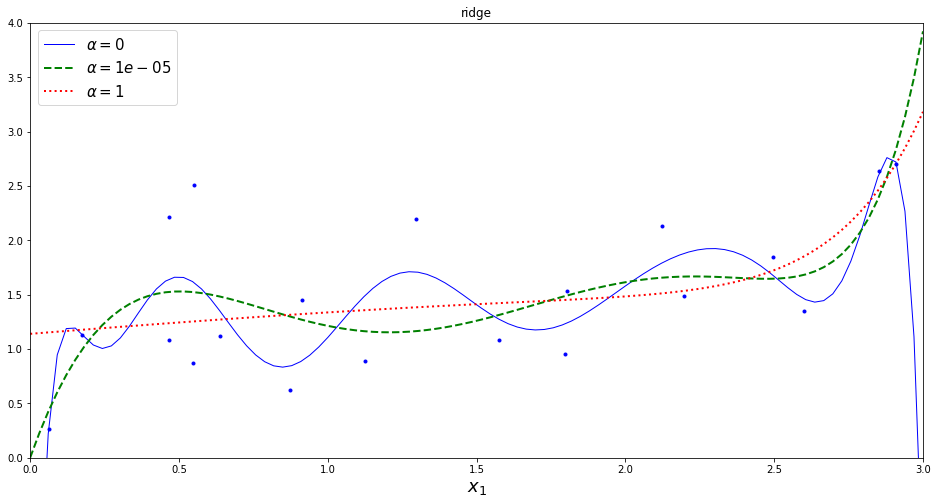

<Figure size 1152x576 with 0 Axes>

In [3]:
from sklearn.linear_model import LinearRegression, SGDRegressor, Ridge, ElasticNet, Lasso
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
%matplotlib inline


def FitAndPlotModel(name, model_class, X, X_new, y, **model_kargs):
    plt.figure(figsize=(16,8))

    alphas=(0, 10**-5, 1)
    random_state=42

    for alpha, style in zip(alphas, ("b-", "g--", "r:")):
        #print(model_kargs)
        model = model_class(alpha, **model_kargs) if alpha > 0 else LinearRegression()
        model_pipe = Pipeline([
                ("poly_features", PolynomialFeatures(degree=12, include_bias=False)),
                ("std_scaler", StandardScaler()),
                ("regul_reg", model),
            ])

        model_pipe.fit(X, y)
        y_new_regul = model_pipe.predict(X_new)

        lw = 2 if alpha > 0 else 1
        plt.plot(X_new, y_new_regul, style, linewidth=lw, label=r"$\alpha = {}$".format(alpha))

    plt.plot(X, y, "b.", linewidth=3)
    plt.legend(loc="upper left", fontsize=15)
    plt.xlabel("$x_1$", fontsize=18)
    plt.title(name)
    plt.axis([0, 3, 0, 4])

def GenerateData():
    np.random.seed(42)
    m = 20
    X = 3 * np.random.rand(m, 1)
    y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
    X_new = np.linspace(0, 3, 100).reshape(100, 1)
    return X, X_new, y

X, X_new, y = GenerateData()

#val = np.linalg.lstsq(X,y)

FitAndPlotModel('ridge',      Ridge,        X, X_new, y)
FitAndPlotModel('lasso',      Lasso,        X, X_new, y)
FitAndPlotModel('elasticnet', ElasticNet,   X, X_new, y, l1_ratio=0.1)

print("OK(plot)")